In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [2]:
img = cv2.imread('SEM_Images/R5 K3Me3 SiO2_3-3.tif')
img = np.array(img, dtype=np.uint8)

In [3]:
#print(img)

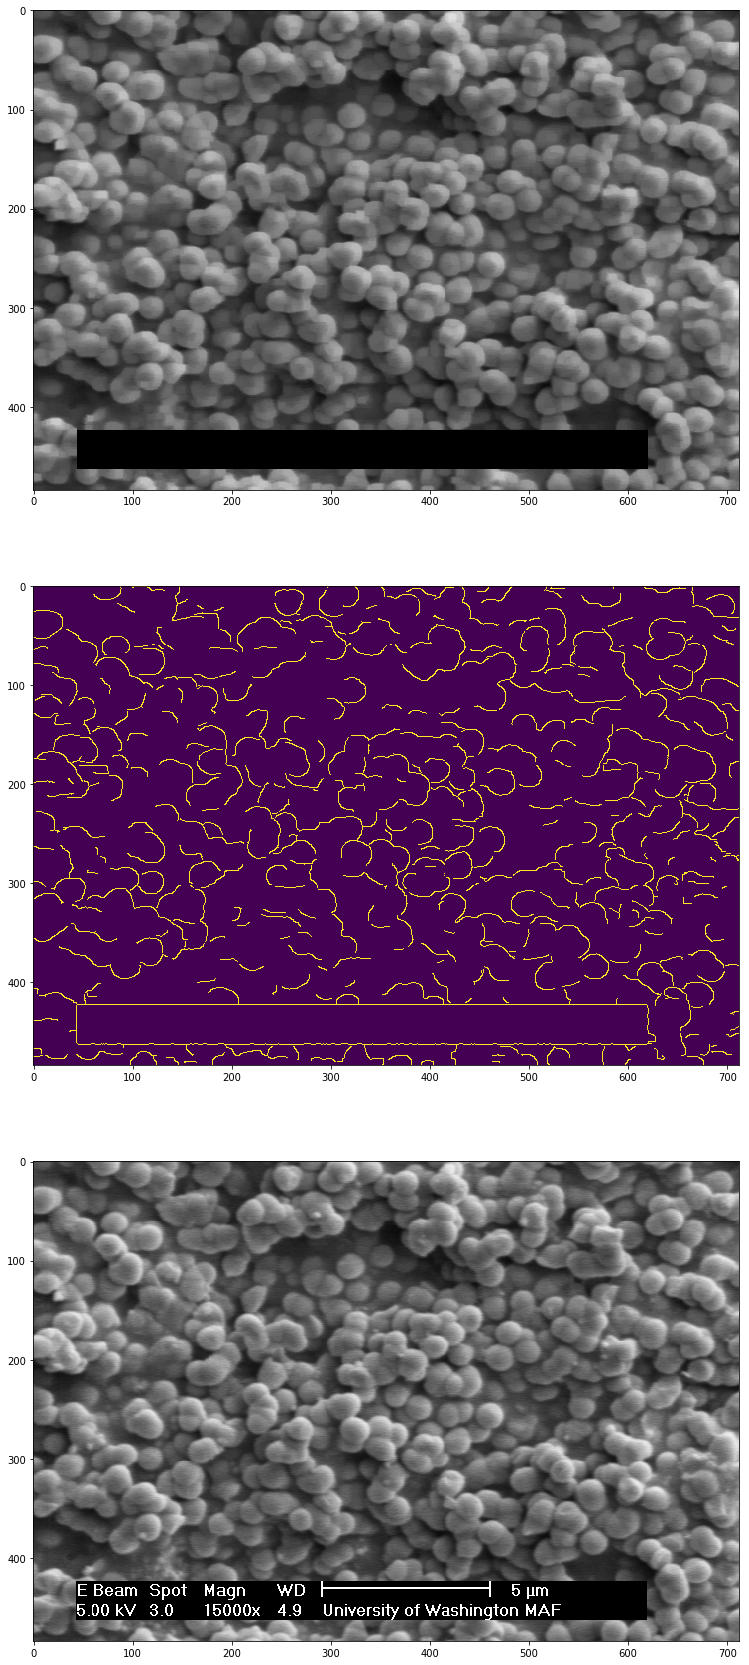

In [4]:
kernel = np.ones((5,6), np.uint8)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
canny = cv2.Canny(opening,100,150,3,L2gradient=True)
fig, ax = plt.subplots(3,1,figsize=(30,30))
ax[0].imshow(opening)
ax[1].imshow(canny)
ax[2].imshow(img)

In [5]:
img_opal = cv2.imread('Opal_tecopa_near_gem.jpg')
img_opal = np.array(img_opal, dtype=np.uint8)

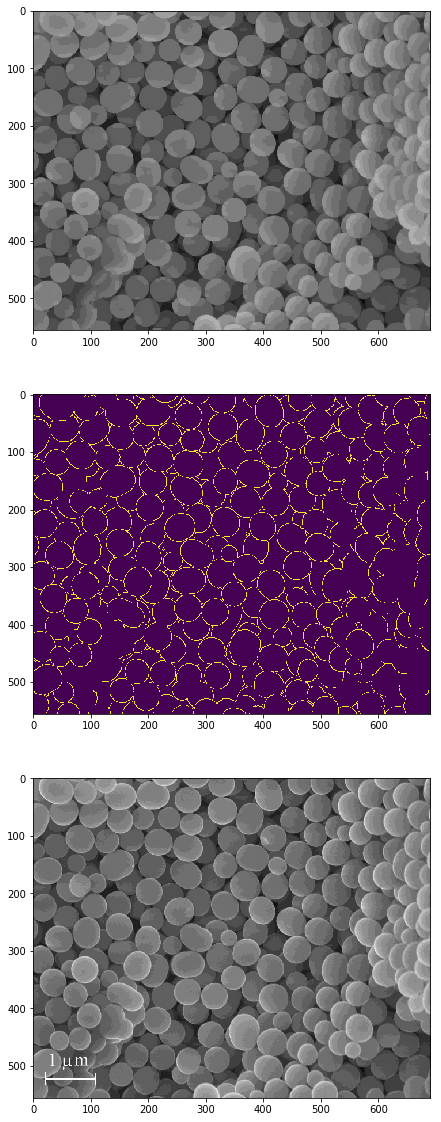

In [6]:
kernel1 = np.ones((5,6), np.uint8)
opening1 = cv2.morphologyEx(img_opal, cv2.MORPH_OPEN, kernel1)
canny1 = cv2.Canny(opening1,100,150,3,L2gradient=True)
fig, ax = plt.subplots(3,1,figsize=(20,20))
ax[0].imshow(opening1)
ax[1].imshow(canny1)
ax[2].imshow(img_opal)

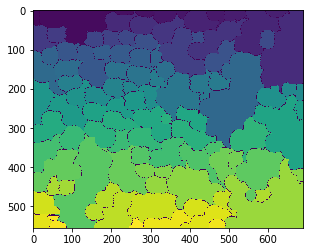

In [12]:
ret, thresh = cv2.threshold(canny1,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
#plt.imshow(thresh)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 5)

# This attempts to dialate the background, but ends up just making the problem worse, hence it being commented out
# sure_bg = cv2.dilate(opening,kernel,iterations=0)

# This was an attempt to differentiate the background from the foreground, but needs some serious work.  Not sure how neccissary this is, though, since markers assign without running this
#dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
#ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Actually assigns markers to each particle!  This worked awesome until I introduced the watershed algorithm, then things just kind of merged together...
ret, markers = cv2.connectedComponents(opening)

# Fills out the markers to their original boundaries, and is doing a pretty good job at showing the actual efficacy of our segmentation
markers_watershed = cv2.watershed(img_opal,markers)
#img[markers == -1] = [255,0,0]

plt.imshow(markers)